## Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
path = "/content/drive/MyDrive/fraud_detection/Fraud.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Checking null values

In [5]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [6]:
data.shape

(6362620, 11)

## Checking basic statistical measures

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking variable information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Checking duplicates

In [9]:
print("Number of duplicate entries: ", data.duplicated().sum())

Number of duplicate entries:  0


## Separating Numerical and Categorical Variables

In [10]:
num_data = data.select_dtypes(include=[np.number])

In [11]:
num_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [12]:
non_num = data.select_dtypes(exclude=[np.number])

In [13]:
non_num.head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


## Plotting data

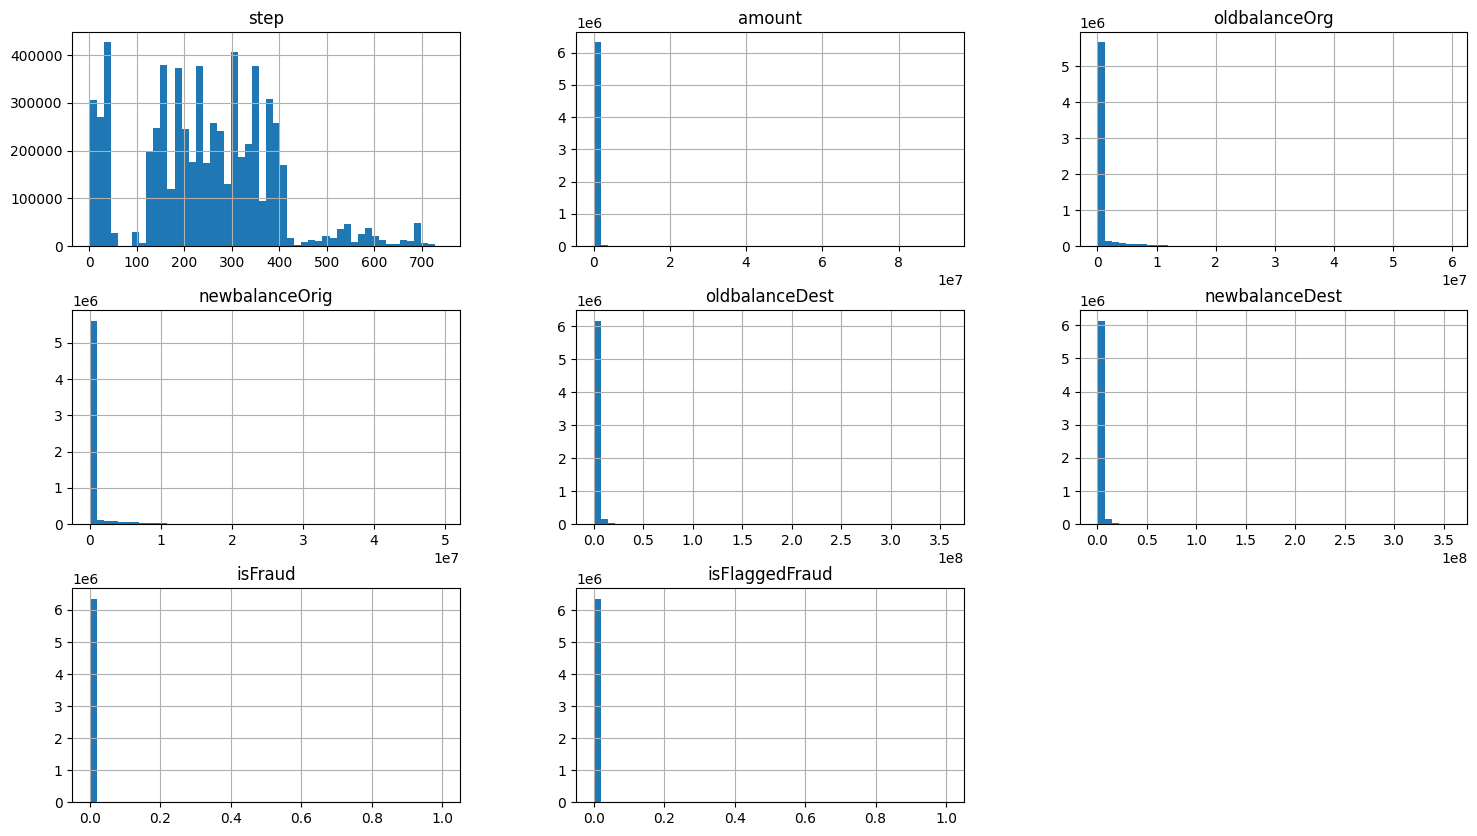

In [13]:
num_data.hist(bins=50, figsize=(18, 10))
plt.show()

## Outlier Check


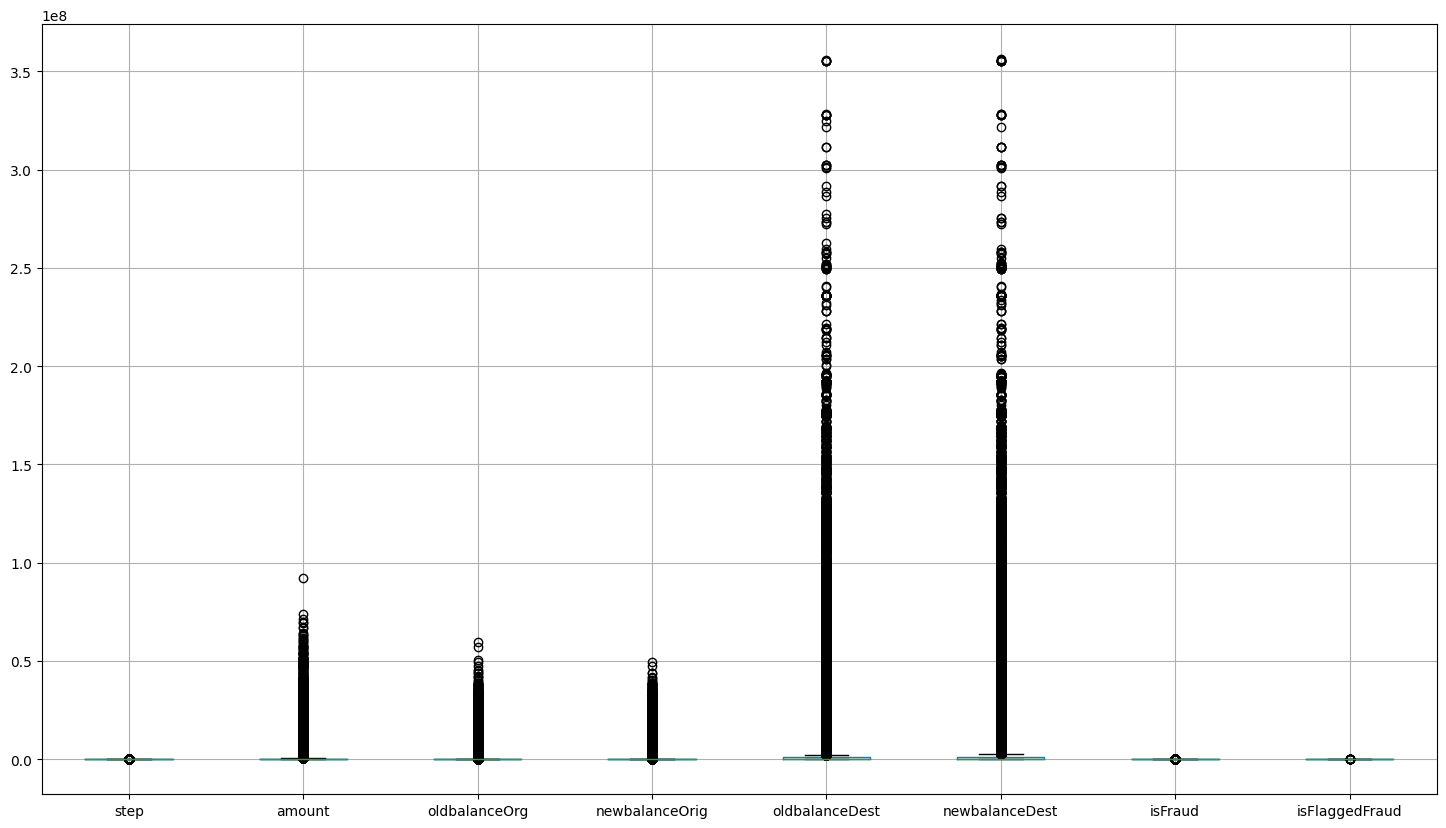

In [ ]:
plt.figure(figsize=(18, 10))
num_data.boxplot()
plt.show()

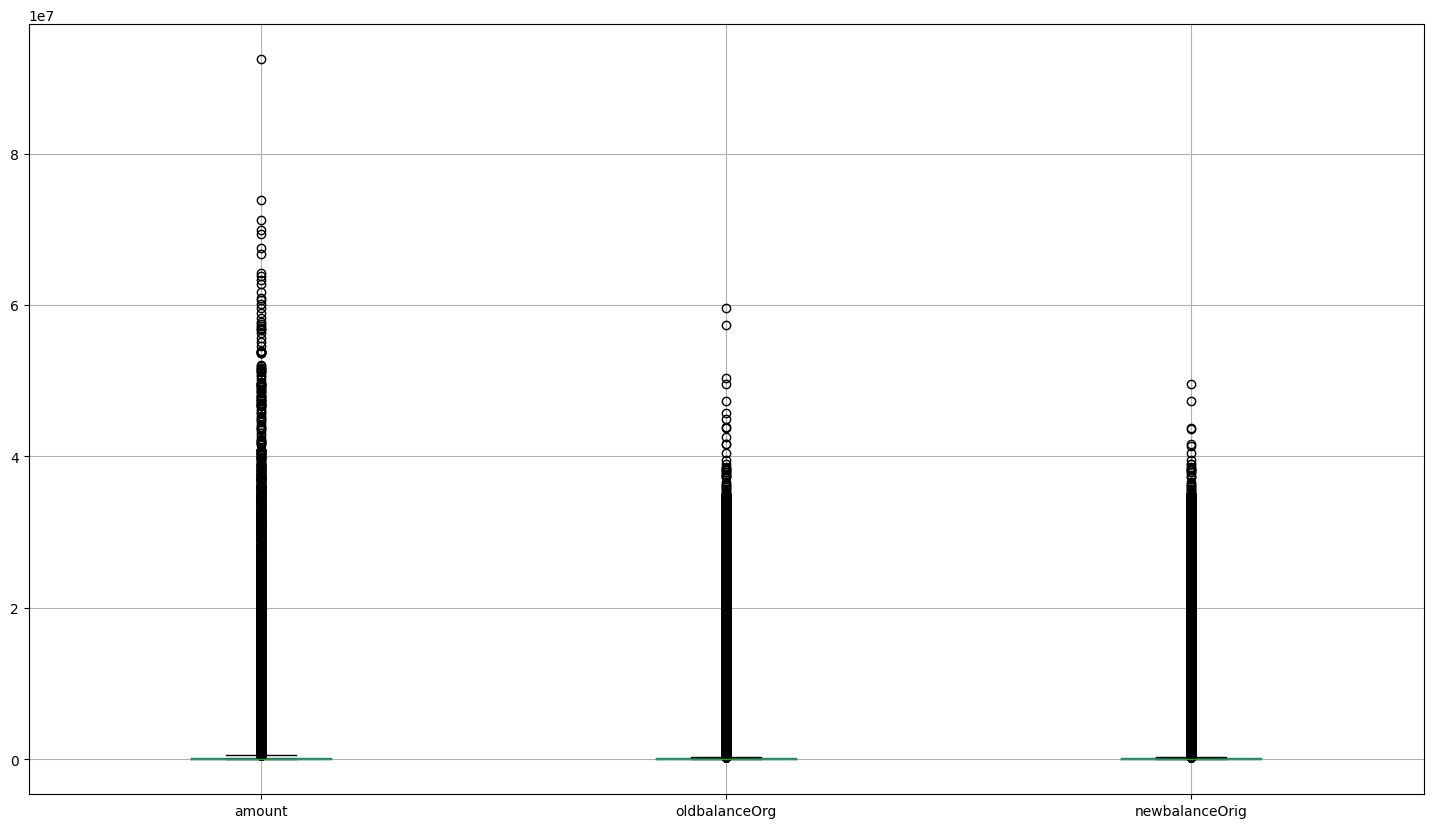

In [ ]:
plt.figure(figsize=(18, 10))
num_data.boxplot(column=['amount', 'oldbalanceOrg', 'newbalanceOrig'], figsize=(18, 10))
plt.show()

## Seems like we have outliers, but we can skip this outlier treatment part because outliers are in amount, old balance, new balance. Logically people can have 0 balance, some people can have billions.

In [14]:
num_data.amount.max()

92445516.64

In [15]:
num_data.amount.min()

0.0

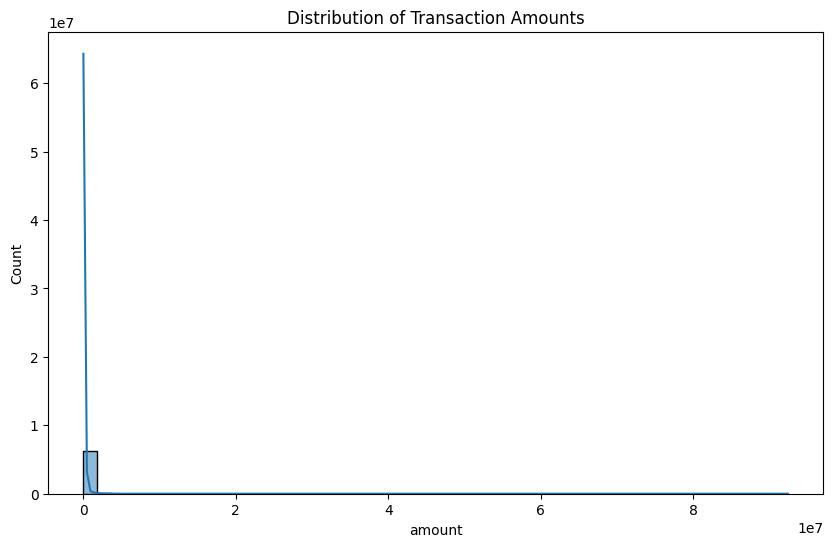

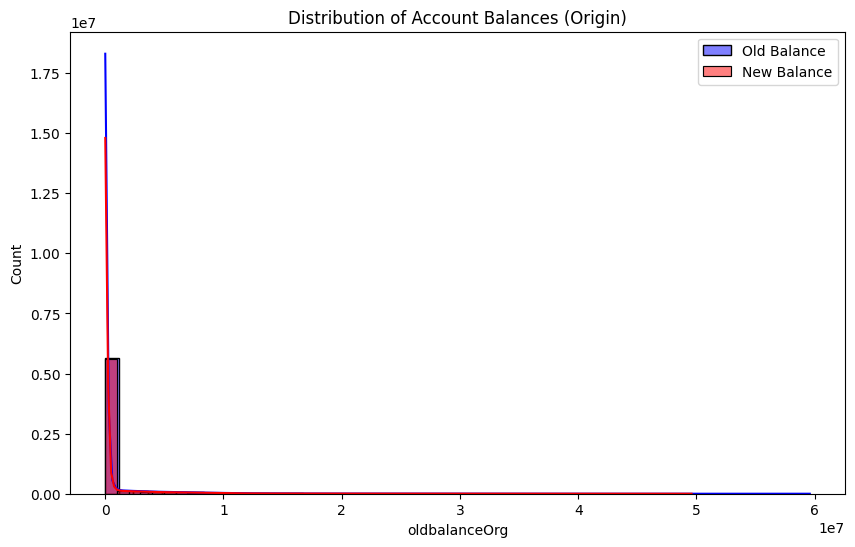

In [19]:
plt.figure(figsize=(10, 6))
sb.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

plt.figure(figsize=(10, 6))
sb.histplot(data['oldbalanceOrg'], bins=50, kde=True, color='blue', label='Old Balance')
sb.histplot(data['newbalanceOrig'], bins=50, kde=True, color='red', label='New Balance')
plt.legend()
plt.title('Distribution of Account Balances (Origin)')
plt.show()

## Correlation matrix

In [14]:
correlation = num_data.corr()

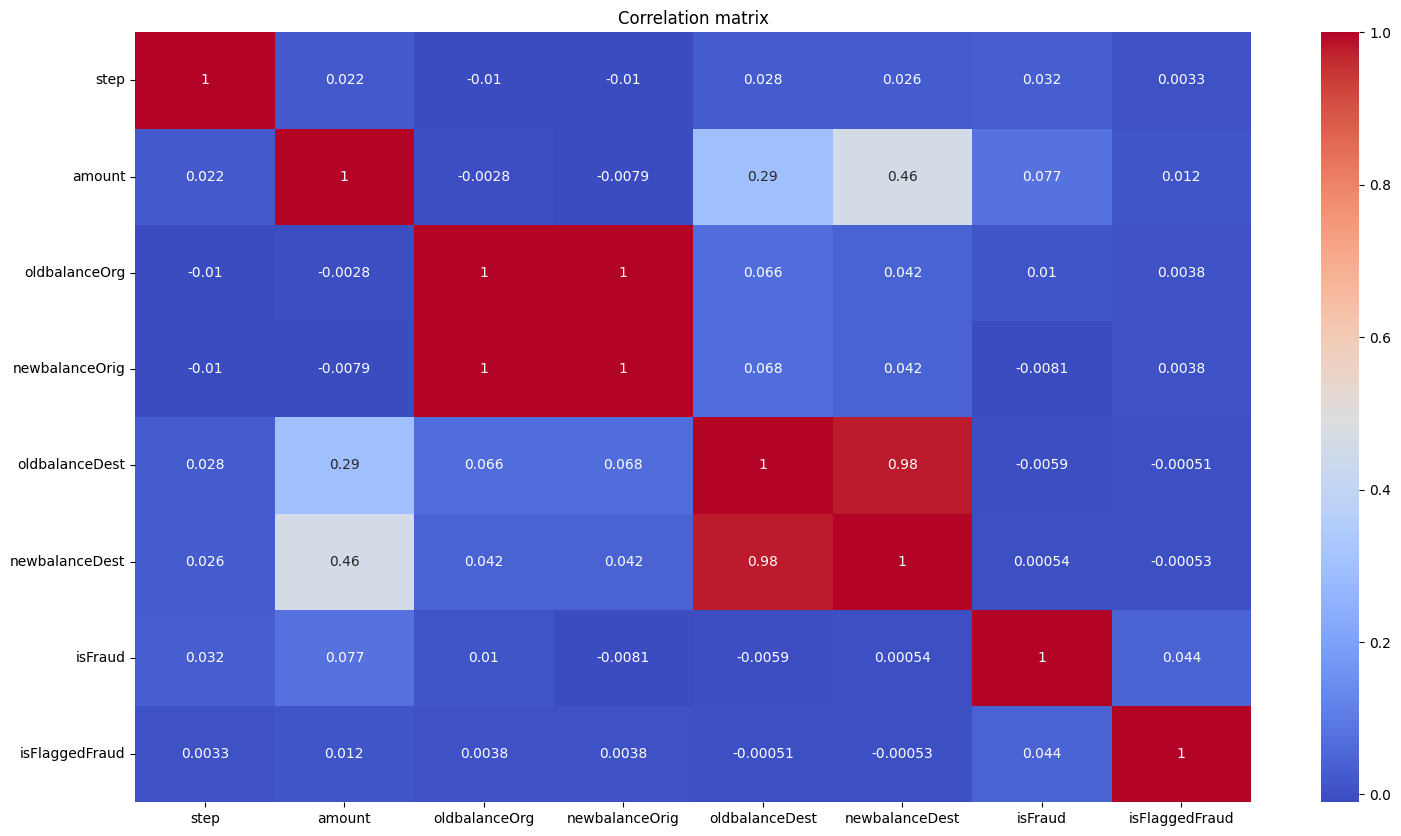

In [17]:
plt.figure(figsize=(18,10))
sb.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

## There's strong correlation between New balance and Old balance, old balance dest and new balance dest. We can drop highly correlated variables

In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
df2 = data.copy()

In [16]:
df2.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)

In [17]:
df2.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


In [18]:
df2["nameOrig"].value_counts()

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
...,...
C98968405,1
C720209255,1
C1567523029,1


## Feature Engineering

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [20]:
#splitting data
x = df2.drop('isFraud', axis=1)
y = df2['isFraud']

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
numeric = x.select_dtypes(exclude=["object"]).columns

In [23]:
non_numeric = x.select_dtypes(include=["object"]).columns

In [24]:
num_transformer = StandardScaler()

In [25]:
for col in non_numeric:
    xtrain[col], _ = pd.factorize(xtrain[col])
    xtest[col], _ = pd.factorize(xtest[col])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numeric)
    ]
)

In [27]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

In [28]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['step', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFlaggedFraud'], dtype='object'))]))])

In [29]:
xtrain_transformed = pipeline.fit_transform(xtrain)

In [30]:
xtest_transformed = pipeline.transform(xtest)

## Handling class imbalance

In [31]:
counts = df2['isFraud'].value_counts()

In [32]:
counts

,count
isFraud,
0,6354407
1,8213


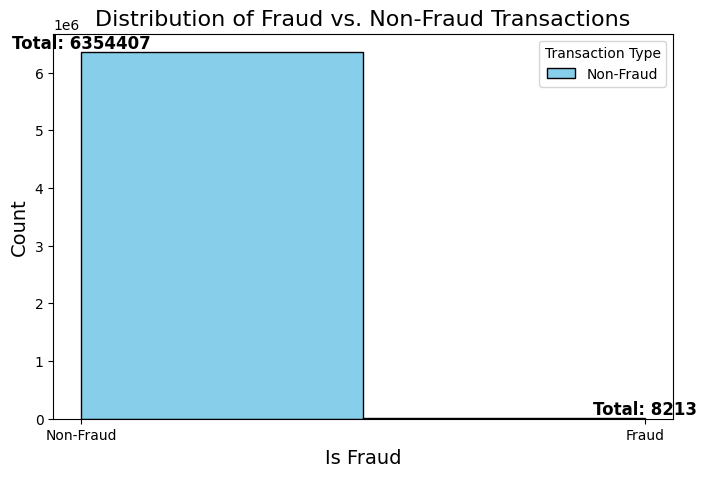

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df2['isFraud'], bins=2, color='skyblue', edgecolor='black', label=['Non-Fraud', 'Fraud'])

plt.title('Distribution of Fraud vs. Non-Fraud Transactions', fontsize=16)
plt.xlabel('Is Fraud', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

for i in range(2):
    plt.text(i, counts[i], f'Total: {counts[i]}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.legend(title="Transaction Type")

plt.show()

In [33]:
smote = SMOTE(random_state=42)
xtrain_smote, ytrain_smote = smote.fit_resample(xtrain_transformed, ytrain)

## Building Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, class_weight='balanced')

In [36]:
rf_model.fit(xtrain_smote, ytrain_smote)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=42)

In [37]:
y_pred = rf_model.predict(xtest_transformed)

In [38]:
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Confusion Matrix:
 [[1218332   52572]
 [    309    1311]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270904
           1       0.02      0.81      0.05      1620

    accuracy                           0.96   1272524
   macro avg       0.51      0.88      0.51   1272524
weighted avg       1.00      0.96      0.98   1272524



In [64]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [40]:
y_pred_prob = rf_model.predict_proba(xtest_transformed)[:, 1]

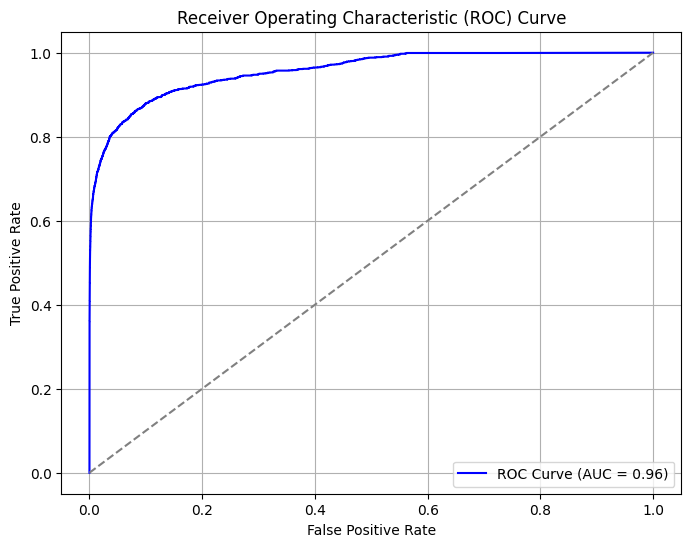

In [41]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

auc_score = roc_auc_score(ytest, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

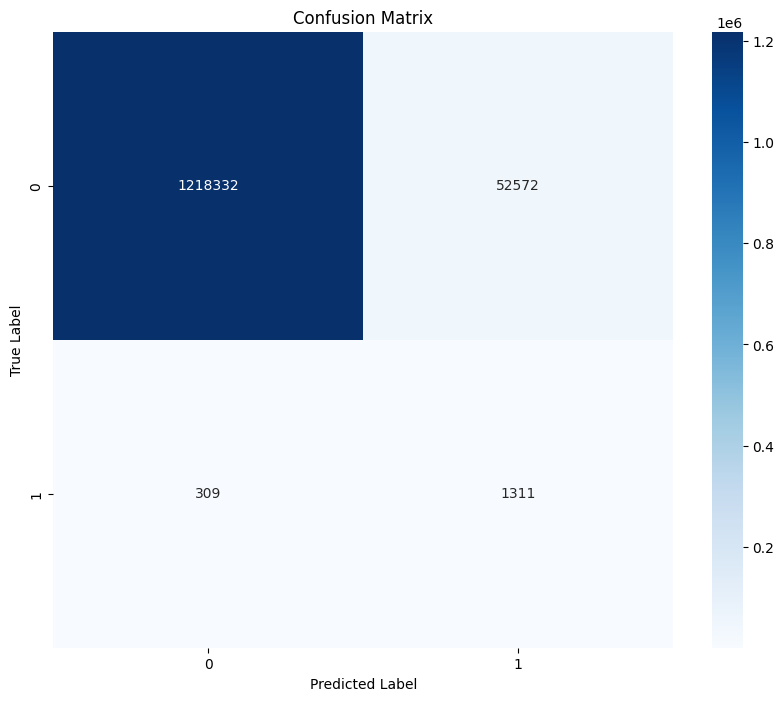

In [42]:
cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Comparing prediction

In [43]:
comparison_df = pd.DataFrame({
    'True Label': ytest,
    'Predicted Label': y_pred,
    'Predicted Probability': y_pred_prob
})

In [44]:
print(comparison_df.head(20))

         True Label  Predicted Label  Predicted Probability
3737323           0                0               0.000000
264914            0                0               0.000494
85647             0                0               0.000000
5899326           0                0               0.142973
2544263           0                0               0.000000
3494160           0                0               0.136175
2331654           0                0               0.164199
1414955           0                0               0.079639
2938135           0                0               0.138897
6133806           0                1               0.656326
985736            0                0               0.258016
1809223           0                0               0.317698
2701656           0                0               0.299285
4106167           0                0               0.195634
396377            0                0               0.361350
4408445           0                0    

## Fraudulant transaction

In [45]:
fraud_cases = comparison_df[(comparison_df['True Label'] == 1) | (comparison_df['Predicted Label'] == 1)]
print(fraud_cases)

         True Label  Predicted Label  Predicted Probability
6133806           0                1               0.656326
3336222           0                1               0.804713
5959799           0                1               0.593879
6140818           0                1               0.684471
6026110           0                1               0.643529
...             ...              ...                    ...
6308699           0                1               0.508684
3194759           0                1               0.811087
750621            0                1               0.615042
6310827           0                1               0.750009
6012861           0                1               0.803412

[54192 rows x 3 columns]


In [46]:
from sklearn.metrics import precision_recall_curve, accuracy_score

In [47]:
y_proba = rf_model.predict_proba(xtest_transformed)[:, 1]
precision, recall, thresholds = precision_recall_curve(ytest, y_proba)

best_threshold = thresholds[np.argmax(precision * recall)]
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

In [48]:
print("Confusion Matrix (Adjusted Threshold):\n", confusion_matrix(ytest, y_pred_adjusted))
print("Classification Report (Adjusted Threshold):\n", classification_report(ytest, y_pred_adjusted))

Confusion Matrix (Adjusted Threshold):
 [[1270691     213]
 [   1047     573]]
Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.73      0.35      0.48      1620

    accuracy                           1.00   1272524
   macro avg       0.86      0.68      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524



In [49]:
accuracy = accuracy_score(ytest, y_pred_adjusted)
print(f'Accuracy (Adjusted Threshold): {accuracy:.4f}')

Accuracy (Adjusted Threshold): 0.9990


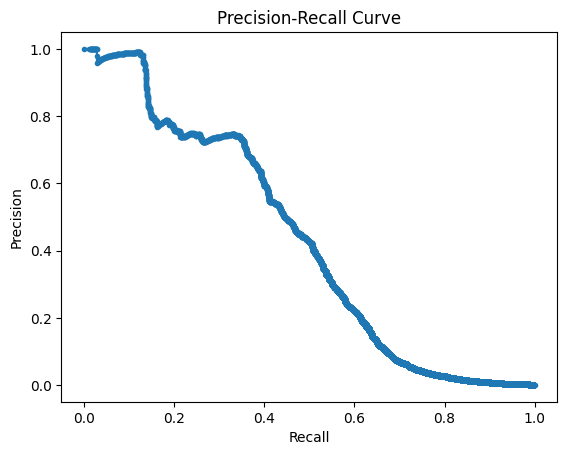

In [50]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

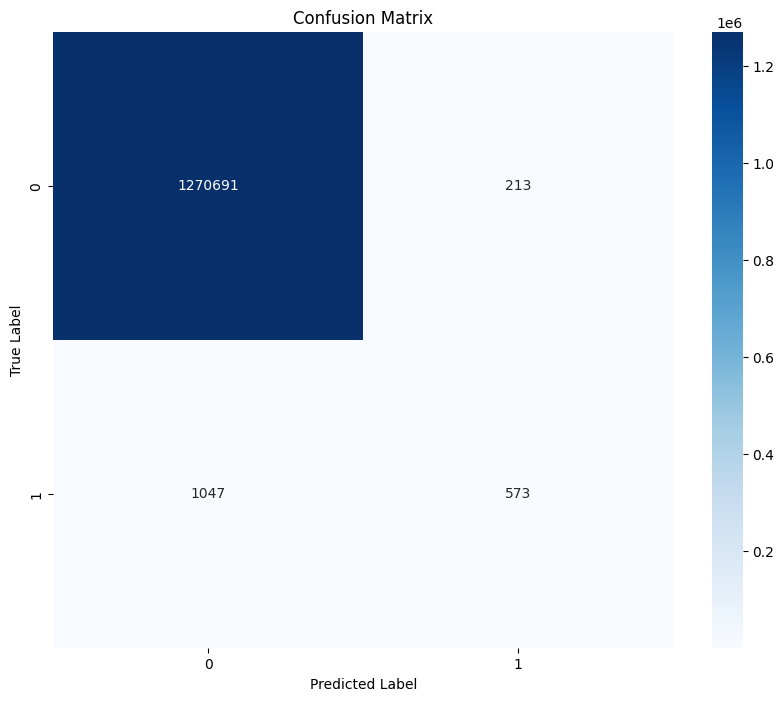

In [51]:
cm2 = confusion_matrix(ytest, y_pred_adjusted)

plt.figure(figsize=(10, 8))
sb.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
comparisn = pd.DataFrame({
    'True Label': ytest,
    'Predicted Label': y_pred_adjusted,
    'Predicted Probability': y_proba
})

In [53]:
comparisn.tail(15)

,True Label,Predicted Label,Predicted Probability
1822074,0,0,0.000000
3242616,0,0,0.000494
571651,0,0,0.000494
1637418,0,0,0.214243
6012861,0,0,0.803412
2168842,0,0,0.000000
1253761,0,0,0.000000
1730697,0,0,0.126696
874093,0,0,0.152177
5930832,0,0,0.169179


In [54]:
fraud_case_adjusted = comparisn[(comparisn['True Label'] == 1) | (comparisn['Predicted Label'] == 1)]
print(fraud_case_adjusted)

         True Label  Predicted Label  Predicted Probability
6303116           1                0               0.522160
3960303           1                0               0.579597
2736446           1                1               0.970000
1030272           1                1               0.967061
1212611           1                0               0.389615
...             ...              ...                    ...
1070765           1                0               0.110529
6362610           1                1               0.966690
6362470           1                0               0.888046
4690001           1                0               0.228434
6027706           0                1               0.965243

[1833 rows x 3 columns]


In [66]:
def find_best_threshold(y_proba, y_true, target_fraud_count):
    thresholds = np.arange(0.0, 1.0, 0.01)
    best_threshold = 0.5
    min_diff = float('inf')

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        fraud_count = np.sum(y_pred)
        diff = abs(fraud_count - target_fraud_count)
        if diff < min_diff:
            min_diff = diff
            best_threshold = threshold

    return best_threshold

In [67]:
best_threshold = find_best_threshold(y_proba, ytest, target_fraud_count=8313)
print(f"Best Threshold: {best_threshold}")

Best Threshold: 0.8


In [68]:
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

In [69]:
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_adjusted))
print("Classification Report:")
print(classification_report(ytest, y_pred_adjusted))

Confusion Matrix:
[[1263420    7484]
 [    564    1056]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.12      0.65      0.21      1620

    accuracy                           0.99   1272524
   macro avg       0.56      0.82      0.60   1272524
weighted avg       1.00      0.99      1.00   1272524



## Random forest with adjusted threshold is better. Let's consider it.